In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import sklearn
from IPython.display import display
%matplotlib inline

/Users/cgosmeyer/anaconda2/envs/astroconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/cgosmeyer/anaconda2/envs/astroconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


X.shape: (26, 2)


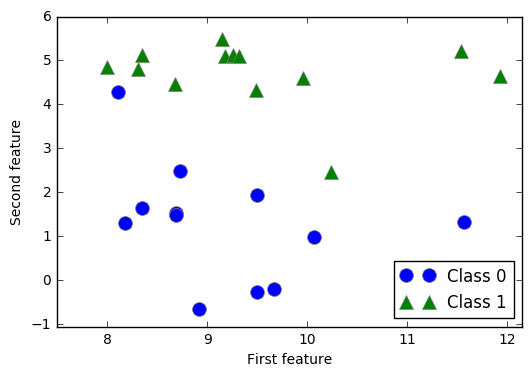

In [2]:
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 
plt.legend(["Class 0", "Class 1"], loc=4) 
plt.xlabel("First feature") 
plt.ylabel("Second feature")

# 26 datapoints with 2 features
print("X.shape: {}".format(X.shape))

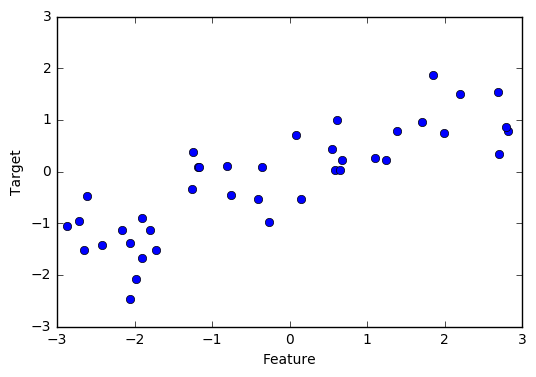

In [3]:
# To illustrate regressive algorithms use dataset with a single input 
# feature and continuous target variable that we want to model.

X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [6]:
# Real-world dataset, where we want to predict whether a tumor is
# cancerous or benign.
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer() 
print("cancer.keys(): \n{}".format(cancer.keys()))
print("Shape of cancer data: {}".format(cancer.data.shape))
print("Sample counts per class:\n{}".format(
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

cancer.keys(): 
dict_keys(['feature_names', 'target_names', 'data', 'target', 'DESCR'])
Shape of cancer data: (569, 30)
Sample counts per class:
{'malignant': 212, 'benign': 357}


In [7]:
# Real-world dataset, to predict median values of homes in Boston.
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


In [8]:
X, y = mglearn.datasets.load_extended_boston() 
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


In [10]:
# Apply k-nearest neighbors
from sklearn.model_selection import train_test_split 
X, y = mglearn.datasets.make_forge()
# Split the dataset to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Instantiate the class.
from sklearn.neighbors import KNeighborsClassifier 
clf = KNeighborsClassifier(n_neighbors=3)
# Fit the classifier to the training set. 
clf.fit(X_train, y_train)
# Make predictions on the test data (computes nearest neighbor and finds most common classes)
print("Test set predictions: {}".format(clf.predict(X_test)))
# Evaluate how well the model generalized.
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


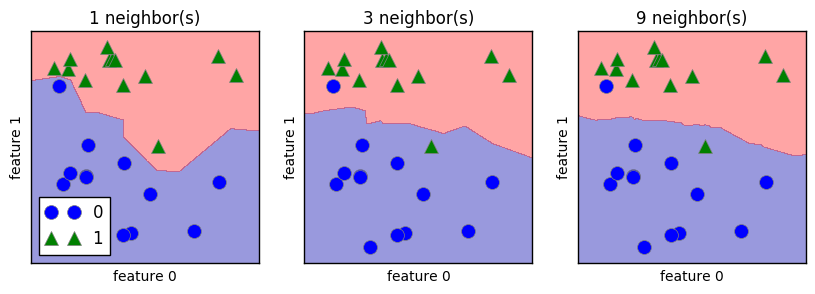

In [12]:
# Visualize the "decision boundaries" for one, three, and nine neighbors
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y) 
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4) 
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)


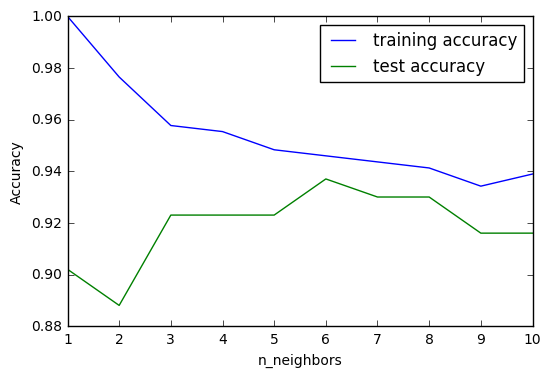

In [14]:
# Use the cancer dataset to show that larger dataset leads to
# less complex model (with smoother "decision boundaries")
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = [] 
test_accuracy = []
# try n_neighbors from 1 to 10 
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors) 
    clf.fit(X_train, y_train)
    # record training set accuracy 
    training_accuracy.append(clf.score(X_train, y_train)) 
    # record generalization accuracy 
    test_accuracy.append(clf.score(X_test, y_test))
    

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


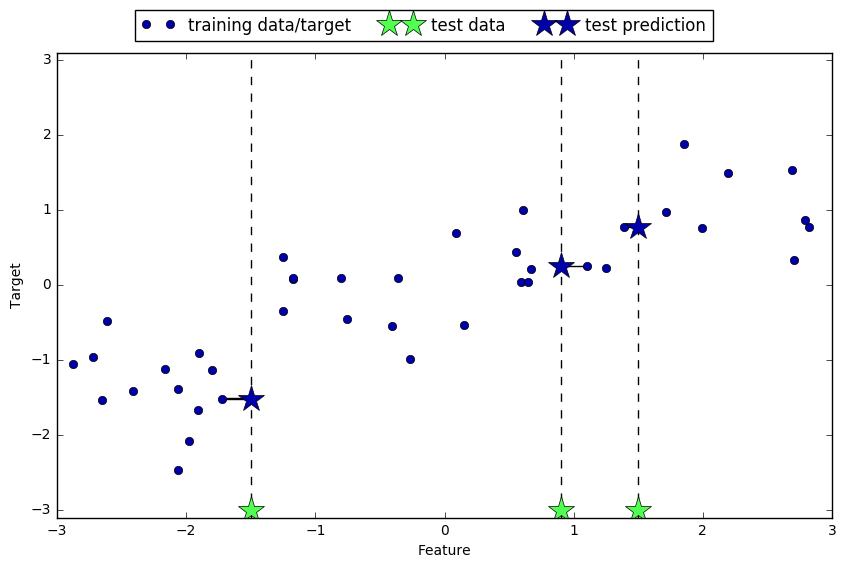

In [15]:
# To illustrate k-nearest neighbors regression, use wave dataset.
mglearn.plots.plot_knn_regression(n_neighbors=1)

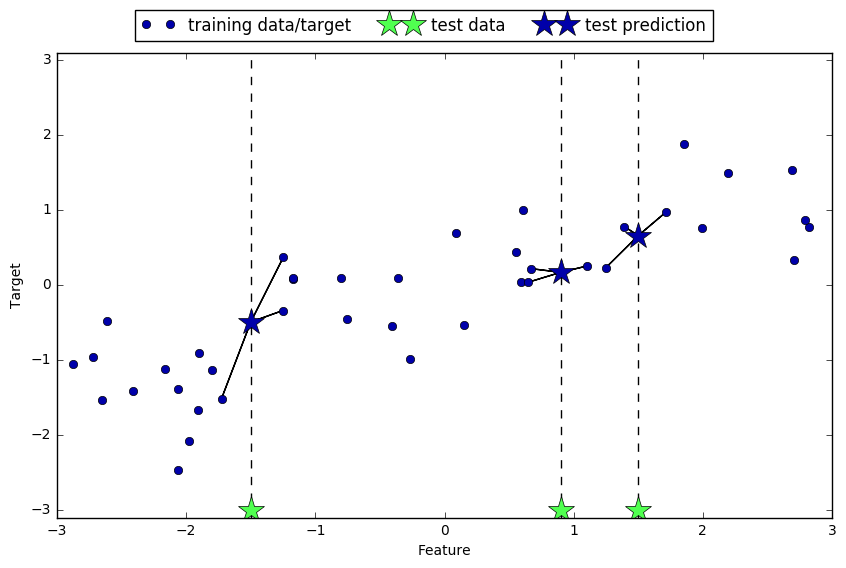

In [16]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [18]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets 
reg.fit(X_train, y_train)


print("Test set predictions:\n{}".format(reg.predict(X_test)))
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2: 0.83


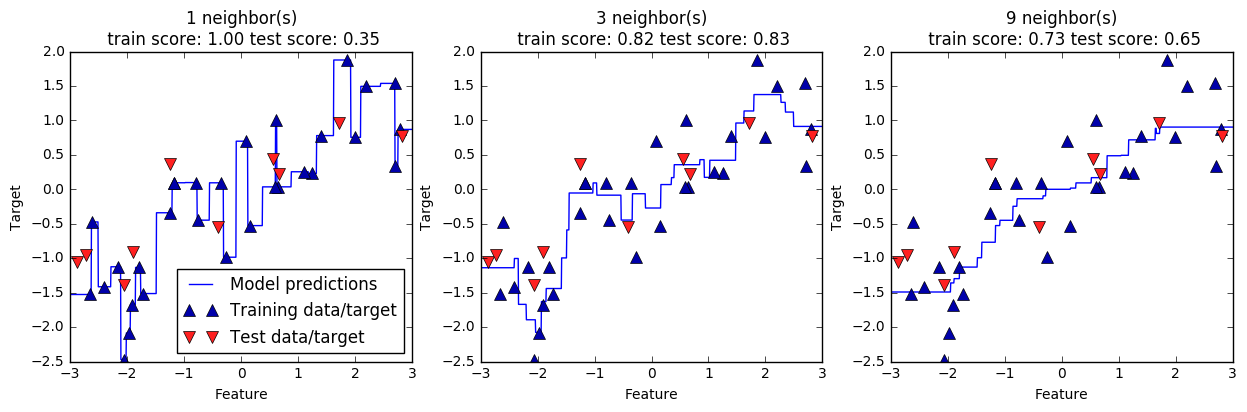

In [19]:
# See what predictions look like for all possible feature values. 

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3 
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
                n_neighbors, reg.score(X_train, y_train),
                reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                    "Test data/target"], loc="best")

LINEAR MODELS

w[0]: 0.393906  b: -0.031804


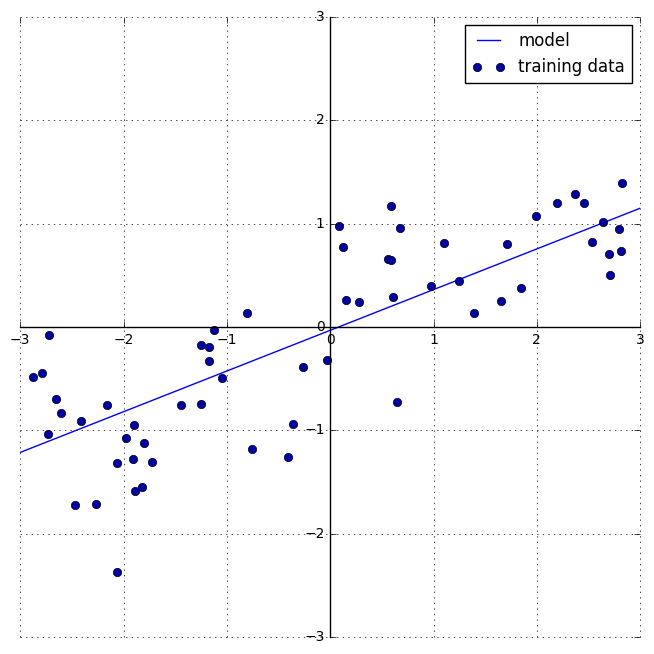

In [20]:
# Let's try to learn the parameters w[0] and b on our one-D wave
# dataset, leading to the following line.

mglearn.plots.plot_linear_regression_wave()

In [23]:
# Linear regression (ordinary least squares) example.

from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_: {}".format(lr.coef_)) # "slope" parameters (w)
print("lr.intercept_: {}".format(lr.intercept_)) # "intercept" (b)


print("Training set score: {:.2f}".format(lr.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

# since training and testing scores (both not good) are similar,
# likely underfitting, not overfitting

lr.coef_: [ 0.39390555]
lr.intercept_: -0.031804343026759746
Training set score: 0.67
Test set score: 0.66


In [24]:
# See how linear regression behaves on more complicated dataset like
# Boston housing.

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

# Because test score is so much worse than training score, clearly
# we are overfitting. 

Training set score: 0.95
Test set score: 0.61


In [25]:
# Try Ridge regression instead so can control complexity and not overfit.
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

# Much better test score!

Training set score: 0.89
Test set score: 0.75


In [26]:
# Try increasing alpha to increase generalization.

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [27]:
# Try decreasing alpha to allow coeff be less restricted

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


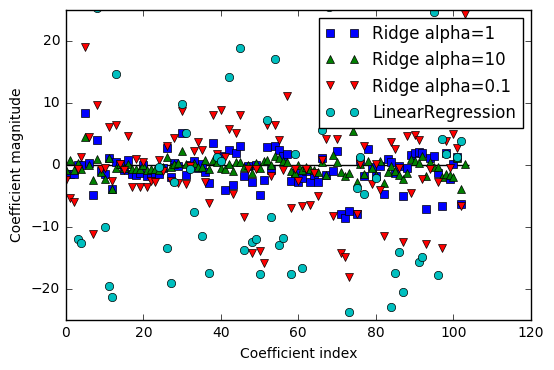

In [28]:
# Let's inspect the `coeff_` attribute with different values of `alpha`
# to get insight into how `alpha` changes the model.

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

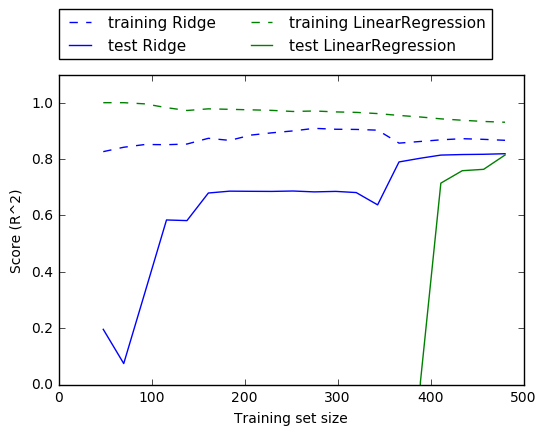

In [29]:
# Fix alpha but vary amount of training data.

mglearn.plots.plot_ridge_n_samples()

In [33]:
# Try Lasso regression, where some coefficients are exactly zero.

from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

# Quite bad -- underfitting!  Try to decrease alpha. Also need
# to increase default setting of `max_iter`.
print()

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train) 
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

# Better than Ridge!

# But if set alpha too low, remove regularization effect and 
# overfit, getting a result similar to LinearRegression:
print()

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train) 
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4

Training set score: 0.90
Test set score: 0.77
Number of features used: 33

Training set score: 0.95
Test set score: 0.64
Number of features used: 94


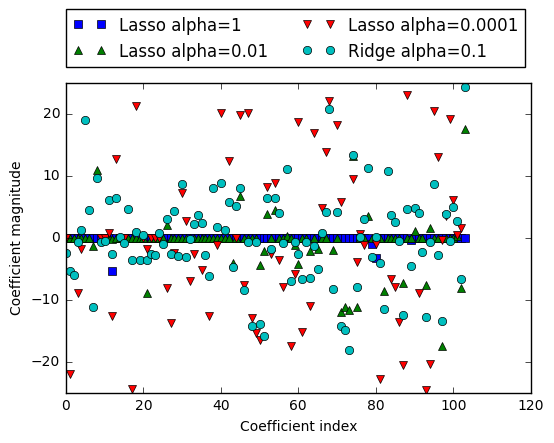

In [34]:
# Plot coefficients of different Lasso models
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")